In [1]:
import torchaudio
import os

In [ ]:
audio_file = os.path.join("timit", "data", "TRAIN", "DR1", "FCJF0", "SA1.WAV")

waveform, sample_rate = torchaudio.load(audio_file)
waveform = waveform.squeeze()

if sample_rate != 16000:
    waveform = torchaudio.transforms.Resample(sample_rate, 16000)(waveform)

In [ ]:
import os
import torchaudio
import nemo.collections.asr as nemo_asr

asr_model = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_en_quartznet15x5")

timit_path = r"timit\data\TRAIN\DR1\FCJF0"
audio_file = os.path.join(timit_path, "SA1.WAV")

waveform, sample_rate = torchaudio.load(audio_file)
if sample_rate != 16000:
    waveform = torchaudio.transforms.Resample(sample_rate, 16000)(waveform)

temp_audio_path = "temp.wav"
torchaudio.save(temp_audio_path, waveform, 16000)

predicted_text = asr_model.transcribe([temp_audio_path])[0]
print("QuartzNet Predicted Text:", predicted_text)


[NeMo I 2024-11-12 13:36:13 nemo_logging:381] Found existing object C:\Users\51man\.cache\torch\NeMo\NeMo_1.21.0\stt_en_quartznet15x5\16661021d16e679bdfd97a2a03944c49\stt_en_quartznet15x5.nemo.
[NeMo I 2024-11-12 13:36:13 nemo_logging:381] Re-using file from: C:\Users\51man\.cache\torch\NeMo\NeMo_1.21.0\stt_en_quartznet15x5\16661021d16e679bdfd97a2a03944c49\stt_en_quartznet15x5.nemo
[NeMo I 2024-11-12 13:36:13 nemo_logging:381] Instantiating model from pre-trained checkpoint


[NeMo W 2024-11-12 13:36:14 nemo_logging:393] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /data2/voices/train_1k.json
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
    - q
    - r
    - s
    - t
    - u
    - v
    - w
    - x
    - 'y'
    - z
    - ''''
    batch_size: 32
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: /asr_set_1.2/train/train_{0..1023}.tar
    num_workers: 20
    
[NeMo W 2024-11-12 13:36:14 nemo_logging:393] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loade

[NeMo I 2024-11-12 13:36:14 nemo_logging:381] PADDING: 16
[NeMo I 2024-11-12 13:36:15 nemo_logging:381] Model EncDecCTCModel was successfully restored from C:\Users\51man\.cache\torch\NeMo\NeMo_1.21.0\stt_en_quartznet15x5\16661021d16e679bdfd97a2a03944c49\stt_en_quartznet15x5.nemo.


Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

[NeMo W 2024-11-12 13:36:15 nemo_logging:393] d:\Anaconda\Lib\site-packages\nemo\collections\asr\parts\preprocessing\features.py:417: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      with torch.cuda.amp.autocast(enabled=False):
    


QuartzNet Predicted Text: she had a duck suit and greasy wash water all year


In [5]:
ground_truth_text = "She had your dark suit in greasy wash water all year"

Word Error Rate: 0.2727272727272727
Match Error Rate: 0.2727272727272727
Word Information Lost Rate: 0.47107438016528924


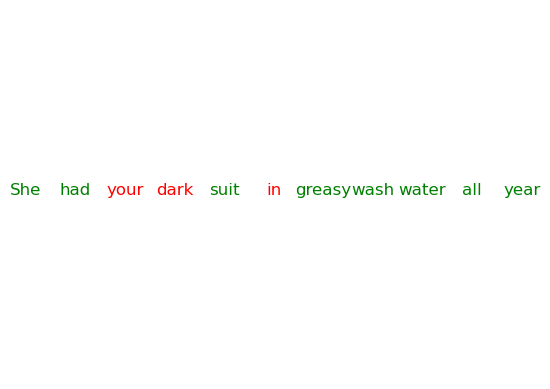

In [6]:
from jiwer import wer, mer, wil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

error_rate = wer(ground_truth_text.lower(), predicted_text.lower())
print("Word Error Rate:", error_rate)

match_error_rate = mer(ground_truth_text.lower(), predicted_text.lower())
wil_rate = wil(ground_truth_text.lower(), predicted_text.lower())
print("Match Error Rate:", match_error_rate)
print("Word Information Lost Rate:", wil_rate)

def visualize_pronunciation(ground_truth, prediction):
    ground_truth_words = ground_truth.split()
    predicted_words = prediction.split()
    
    fig, ax = plt.subplots()
    for idx, word in enumerate(ground_truth_words):
        color = 'green' if idx < len(predicted_words) and word.lower() == predicted_words[idx].lower() else 'red'
        ax.text(idx * 0.1, 0.5, word, color=color, fontsize=12, ha='center')
    ax.axis('off')
    plt.show()

visualize_pronunciation(ground_truth_text, predicted_text)

[NeMo W 2024-11-12 13:36:20 nemo_logging:393] C:\Users\51man\AppData\Local\Temp\ipykernel_13944\2587123866.py:5: FutureWarning: 
    
    Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.
    
      sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_d")
    


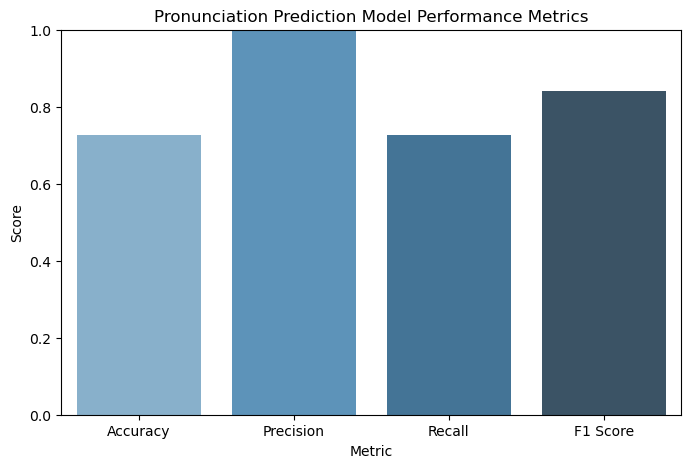

In [7]:

def plot_performance_metrics(accuracy, precision, recall, f1):
    metrics = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_d")
    plt.ylim(0, 1)
    plt.title("Pronunciation Prediction Model Performance Metrics")
    plt.ylabel("Score")
    plt.xlabel("Metric")
    plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_labels(ground_truth, prediction):
    ground_truth_words = ground_truth.split()
    predicted_words = prediction.split()
    labels = [1 if gt.lower() == pd.lower() else 0 for gt, pd in zip(ground_truth_words, predicted_words)]
    return labels

labels = get_labels(ground_truth_text, predicted_text)

accuracy = accuracy_score([1]*len(labels), labels)
precision = precision_score([1]*len(labels), labels)
recall = recall_score([1]*len(labels), labels)
f1 = f1_score([1]*len(labels), labels)

plot_performance_metrics(accuracy, precision, recall, f1)


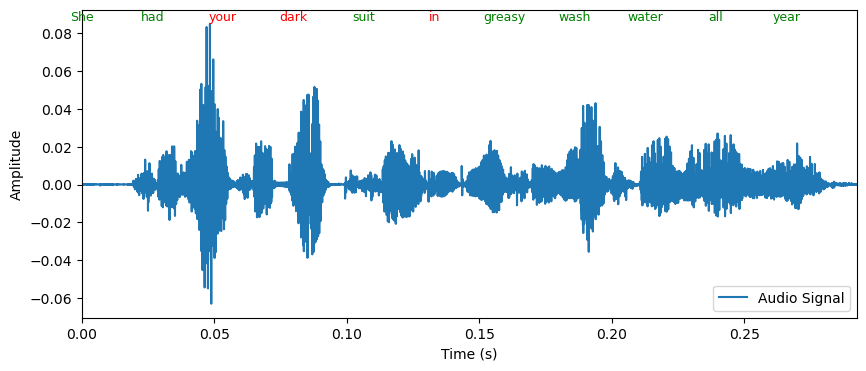

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchaudio

def visualize_audio_with_text_overlay(waveform, ground_truth, prediction, sample_rate=16000, downsample_factor=10):
    waveform = waveform[0, ::downsample_factor]  

    ground_truth_words = ground_truth.split()
    predicted_words = prediction.split()

    total_time = waveform.size(0) / sample_rate
    word_times = np.linspace(0, total_time, len(ground_truth_words) + 1)

    fig, ax = plt.subplots(figsize=(10, 4))  
    ax.plot(np.linspace(0, total_time, waveform.size(0)), waveform.numpy(), label="Audio Signal")
    
    for idx, word in enumerate(ground_truth_words):
        color = 'green' if idx < len(predicted_words) and word.lower() == predicted_words[idx].lower() else 'red'
        ax.text(word_times[idx], waveform.max(), word, color=color, fontsize=9, ha='center', va='bottom')
    
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude")
    ax.set_xlim(0, total_time)  
    plt.legend()
    plt.show()

visualize_audio_with_text_overlay(waveform, ground_truth_text, predicted_text)


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_labels(ground_truth, prediction):
    ground_truth_words = ground_truth.split()
    predicted_words = prediction.split()
    labels = [1 if gt.lower() == pd.lower() else 0 for gt, pd in zip(ground_truth_words, predicted_words)]
    return labels

labels = get_labels(ground_truth_text, predicted_text)

accuracy = accuracy_score([1]*len(labels), labels)
precision = precision_score([1]*len(labels), labels)
recall = recall_score([1]*len(labels), labels)
f1 = f1_score([1]*len(labels), labels)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.73
Precision: 1.00
Recall: 0.73
F1 Score: 0.84
